In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils import data

from sklearn.preprocessing import MinMaxScaler

## HW1 Regression

**Address**: https://www.kaggle.com/c/ml2021spring-hw1

### Task Description

- COVID-19 daily cases prediction
- Training data: 2700 samples
- Testing data: 893 samples
- Evaluation metric: Root Mean Squared Error (RMSE)

### Data Processing

Read Data

In [2]:
train_set = pd.read_csv('./Data/covid.train.csv')
test_set = pd.read_csv('./Data/covid.test.csv')
train_set.describe()

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2,tested_positive.2
count,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,...,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000
mean,1349.500000,0.024815,0.024815,0.024815,0.024815,0.024815,0.024815,0.024815,0.024815,0.024815,...,16.578290,36.074941,10.257474,2.385735,18.067635,13.058828,19.243283,64.834307,44.568440,16.431280
std,779.567188,0.155589,0.155589,0.155589,0.155589,0.155589,0.155589,0.155589,0.155589,0.155589,...,5.651583,6.655166,4.686263,1.053147,2.250081,1.628589,2.708339,6.220087,5.232030,7.619354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.637414,21.485815,2.118674,0.728770,12.980786,8.370536,13.400399,48.225603,33.113882,2.338708
25%,674.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.200532,30.606711,6.532543,1.714080,16.420485,11.914167,17.322912,59.782876,40.549987,10.327314
50%,1349.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.227010,36.041389,9.700368,2.199521,17.684197,12.948749,18.760267,65.932259,43.997637,15.646480
75%,2024.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.207162,41.508520,13.602566,2.730469,19.503419,14.214320,20.713638,69.719651,48.118283,22.535165
max,2699.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.488220,50.606465,24.496711,8.162275,28.574091,18.715944,28.366270,77.701014,58.433600,40.959495


Min-Max Scale

In [3]:
features = train_set.iloc[:, :-1].values
labels = train_set.iloc[:, -1].values

scale = MinMaxScaler()
features_scaled = scale.fit_transform(features)
test_set_scaled = scale.transform(test_set.values)

labels_scaled = labels / 100

Load Dataset

In [4]:
def load_Dataset(data_arrays, batch_size, shuffle = True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle)

features_scaled_tensor = torch.FloatTensor(features_scaled)
labels_scaled_tensor = torch.FloatTensor(labels_scaled)

train_iter = load_Dataset((features_scaled_tensor, 
                           labels_scaled_tensor),
                           batch_size = 100)

Define model, loss and optimizer, then train.

epoch: 0, loss: 0.168
epoch: 1, loss: 0.070
epoch: 2, loss: 0.046
epoch: 3, loss: 0.034
epoch: 4, loss: 0.029
epoch: 5, loss: 0.025
epoch: 6, loss: 0.023
epoch: 7, loss: 0.021
epoch: 8, loss: 0.020
epoch: 9, loss: 0.019
epoch: 10, loss: 0.018
epoch: 11, loss: 0.017
epoch: 12, loss: 0.016
epoch: 13, loss: 0.015
epoch: 14, loss: 0.014
epoch: 15, loss: 0.013
epoch: 16, loss: 0.013
epoch: 17, loss: 0.012
epoch: 18, loss: 0.012
epoch: 19, loss: 0.011


Text(0, 0.5, 'loss')

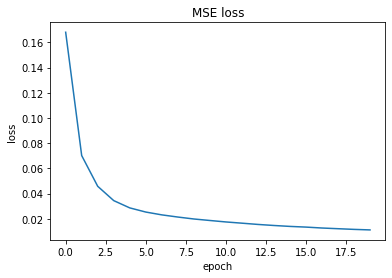

In [10]:
model = nn.Sequential(
    nn.Linear(94, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 1)
)

loss = nn.MSELoss()
Optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

epochs = 20
loss_list = []
for epoch in range(epochs):
    l_sum = 0
    for X, y in train_iter:
        l = loss(model(X).reshape(-1), y)
        Optimizer.zero_grad()
        l.backward()
        Optimizer.step()
        l_sum += float(l)
    loss_list.append(l_sum)
    print(f'epoch: {epoch}, loss: {l_sum:.3f}')
    
plt.plot(loss_list)
plt.title('MSE loss')
plt.xlabel('epoch')
plt.ylabel('loss')

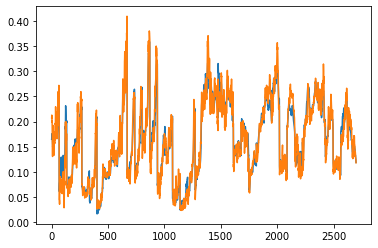

In [16]:
with torch.no_grad():
    predictions = model(features_scaled_tensor.detach()).reshape(-1)
    plt.plot(predictions)
    plt.plot(labels_scaled_tensor)

On test set:

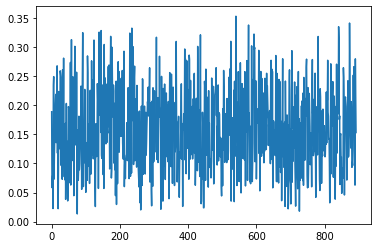

In [25]:
test_tensor = torch.FloatTensor(test_set_scaled)
test_pred = model(test_tensor).reshape(-1, 1).detach().numpy()
plt.plot(test_pred)

In [53]:
id = np.arange(test_pred.shape[0], dtype = int).reshape(-1, 1)
Submission = pd.DataFrame(np.concatenate((id, test_pred * 100), axis = 1), 
                          columns = ['id', 'tested_positive'])
Submission.set_index(['id'], inplace=True)
Submission.to_csv('./Submission.csv')